In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("BHSA-phrase-data-cleared.csv",sep="\t",header=None)
df.columns=["phrasestart","phrasenum","ptyp","pfunction"]

In [6]:
df.head()

,phrasestart,phrasenum,ptyp,pfunction
0,1,p1,<undet>Prepositional phrase</undet>,Time reference
1,3,p2,Verbal phrase,Predicate
2,4,p3,<undet>Nominal phrase</undet>,Subject
3,5,p4,<det>Prepositional phrase</det>,Object
4,12,p5,Conjunctive phrase,Conjunction


In [7]:
df["ptyp"].value_counts()

Verbal phrase                                                              68991
Conjunctive phrase                                                         52470
<det>Prepositional phrase</det>                                            48407
<det>Nominal phrase</det>                                                  20532
<undet>Nominal phrase</undet>                                              20451
<det>Proper-noun phrase</det>                                              10143
<undet>Prepositional phrase</undet>                                         8844
Negative phrase                                                             6738
Adverbial phrase                                                            5641
<det>Personal pronoun phrase</det>                                          4334
Interjectional phrase                                                       1862
Adjective phrase                                                            1623
Interrogative phrase        

In [8]:
df["pfunction"].value_counts()

Predicate                                   57069
Conjunction                                 46143
Subject                                     32113
Complement                                  30134
Object                                      22926
Predicate complement                        19411
Adjunct                                      9573
Relative                                     6329
Negation                                     6047
Predicate with object suffix                 5411
Modifier                                     3986
Time reference                               3874
Locative                                     2640
Interjection                                 1621
Vocative                                     1607
Question                                     1204
Fronted element                              1168
Predicate with subject suffix                 887
Negative copula                               595
Interjection with subject suffix              251


In [9]:
df.groupby('ptyp')["pfunction"]\
  .apply(lambda x: x.nunique())

ptyp
<det>Demonstrative pronoun phrase</det>                                     4
<det>Demonstrative pronoun phrase</det>, <prela>Resumption</prela>          2
<det>Nominal phrase</det>                                                  11
<det>Nominal phrase</det>, <prela>Predicative adjunct</prela>               1
<det>Nominal phrase</det>, <prela>Resumption</prela>                        5
<det>Personal pronoun phrase</det>                                          5
<det>Personal pronoun phrase</det>, <prela>Resumption</prela>               2
<det>Prepositional phrase</det>                                            10
<det>Prepositional phrase</det>, <prela>Predicative adjunct</prela>         1
<det>Prepositional phrase</det>, <prela>Resumption</prela>                  6
<det>Proper-noun phrase</det>                                               7
<det>Proper-noun phrase</det>, <prela>Resumption</prela>                    1
<undet>Interrogative pronoun phrase</undet>                

In [10]:
df.groupby('pfunction')["ptyp"]\
  .apply(lambda x: x.nunique())

pfunction
Adjunct                                      6
Complement                                   9
Conjunction                                  2
Enclitic personal pronoun                    1
Existence                                    1
Existence with subject suffix                2
Fronted element                              9
Interjection                                 1
Interjection with subject suffix             2
Locative                                     8
Modifier                                     4
Modifier with subject suffix                 2
Negation                                     1
Negative copula                              1
Negative copula with subject suffix          2
Object                                      12
Participle with object suffix                1
Predicate                                    2
Predicate complement                        16
Predicate complement with subject suffix     1
Predicate with object suffix                 2
Pre

In [11]:
grouping=df[["ptyp","pfunction","phrasenum"]].groupby(["ptyp","pfunction"]).count()
grouping

phrasenum
ptyp                                               pfunction                               
<det>Demonstrative pronoun phrase</det>            Fronted element                       21
                                                   Object                               119
                                                   Predicate complement                  10
                                                   Subject                              643
<det>Demonstrative pronoun phrase</det>, <prela... Object                                 1
...                                                                                     ...
Verbal phrase                                      Predicate with object suffix        5383
                                                   Predicate with subject suffix        887
Verbal phrase, <prela>Resumption</prela>           Predicate                             10
                                                   Predicate complement                   1
                                                   Predicate with object suffix          28

[122 rows x 1 columns]

In [12]:
grouping.index.get_level_values(0)

Index(['<det>Demonstrative pronoun phrase</det>',
       '<det>Demonstrative pronoun phrase</det>',
       '<det>Demonstrative pronoun phrase</det>',
       '<det>Demonstrative pronoun phrase</det>',
       '<det>Demonstrative pronoun phrase</det>, <prela>Resumption</prela>',
       '<det>Demonstrative pronoun phrase</det>, <prela>Resumption</prela>',
       '<det>Nominal phrase</det>', '<det>Nominal phrase</det>',
       '<det>Nominal phrase</det>', '<det>Nominal phrase</det>',
       ...
       'Prepositional phrase',
       'Prepositional phrase, <prela>Resumption</prela>', 'Verbal phrase',
       'Verbal phrase', 'Verbal phrase', 'Verbal phrase', 'Verbal phrase',
       'Verbal phrase, <prela>Resumption</prela>',
       'Verbal phrase, <prela>Resumption</prela>',
       'Verbal phrase, <prela>Resumption</prela>'],
      dtype='object', name='ptyp', length=122)

In [13]:
newframe=grouping.index.to_frame()
newframe["counts"]=grouping

In [16]:
newframe

ptyp  \
ptyp                                               pfunction                                                                          
<det>Demonstrative pronoun phrase</det>            Fronted element                          <det>Demonstrative pronoun phrase</det>   
                                                   Object                                   <det>Demonstrative pronoun phrase</det>   
                                                   Predicate complement                     <det>Demonstrative pronoun phrase</det>   
                                                   Subject                                  <det>Demonstrative pronoun phrase</det>   
<det>Demonstrative pronoun phrase</det>, <prela... Object                         <det>Demonstrative pronoun phrase</det>, <prel...   
...                                                                                                                             ...   
Verbal phrase                                      Predicate with object suffix                                       Verbal phrase   
                                                   Predicate with subject suffix                                      Verbal phrase   
Verbal phrase, <prela>Resumption</prela>           Predicate                               Verbal phrase, <prela>Resumption</prela>   
                                                   Predicate complement                    Verbal phrase, <prela>Resumption</prela>   
                                                   Predicate with object suffix            Verbal phrase, <prela>Resumption</prela>   

                                                                                                      pfunction  \
ptyp                                               pfunction                                                      
<det>Demonstrative pronoun phrase</det>            Fronted element                              Fronted element   
                                                   Object                                                Object   
                                                   Predicate complement                    Predicate complement   
                                                   Subject                                              Subject   
<det>Demonstrative pronoun phrase</det>, <prela... Object                                                Object   
...                                                                                                         ...   
Verbal phrase                                      Predicate with object suffix    Predicate with object suffix   
                                                   Predicate with subject suffix  Predicate with subject suffix   
Verbal phrase, <prela>Resumption</prela>           Predicate                                          Predicate   
                                                   Predicate complement                    Predicate complement   
                                                   Predicate with object suffix    Predicate with object suffix   

                                                                                  counts  
ptyp                                               pfunction                              
<det>Demonstrative pronoun phrase</det>            Fronted element                    21  
                                                   Object                            119  
                                                   Predicate complement               10  
                                                   Subject                           643  
<det>Demonstrative pronoun phrase</det>, <prela... Object                              1  
...                                                                                  ...  
Verbal phrase                                      Predicate with object suffix     5383  
                                                   Predi

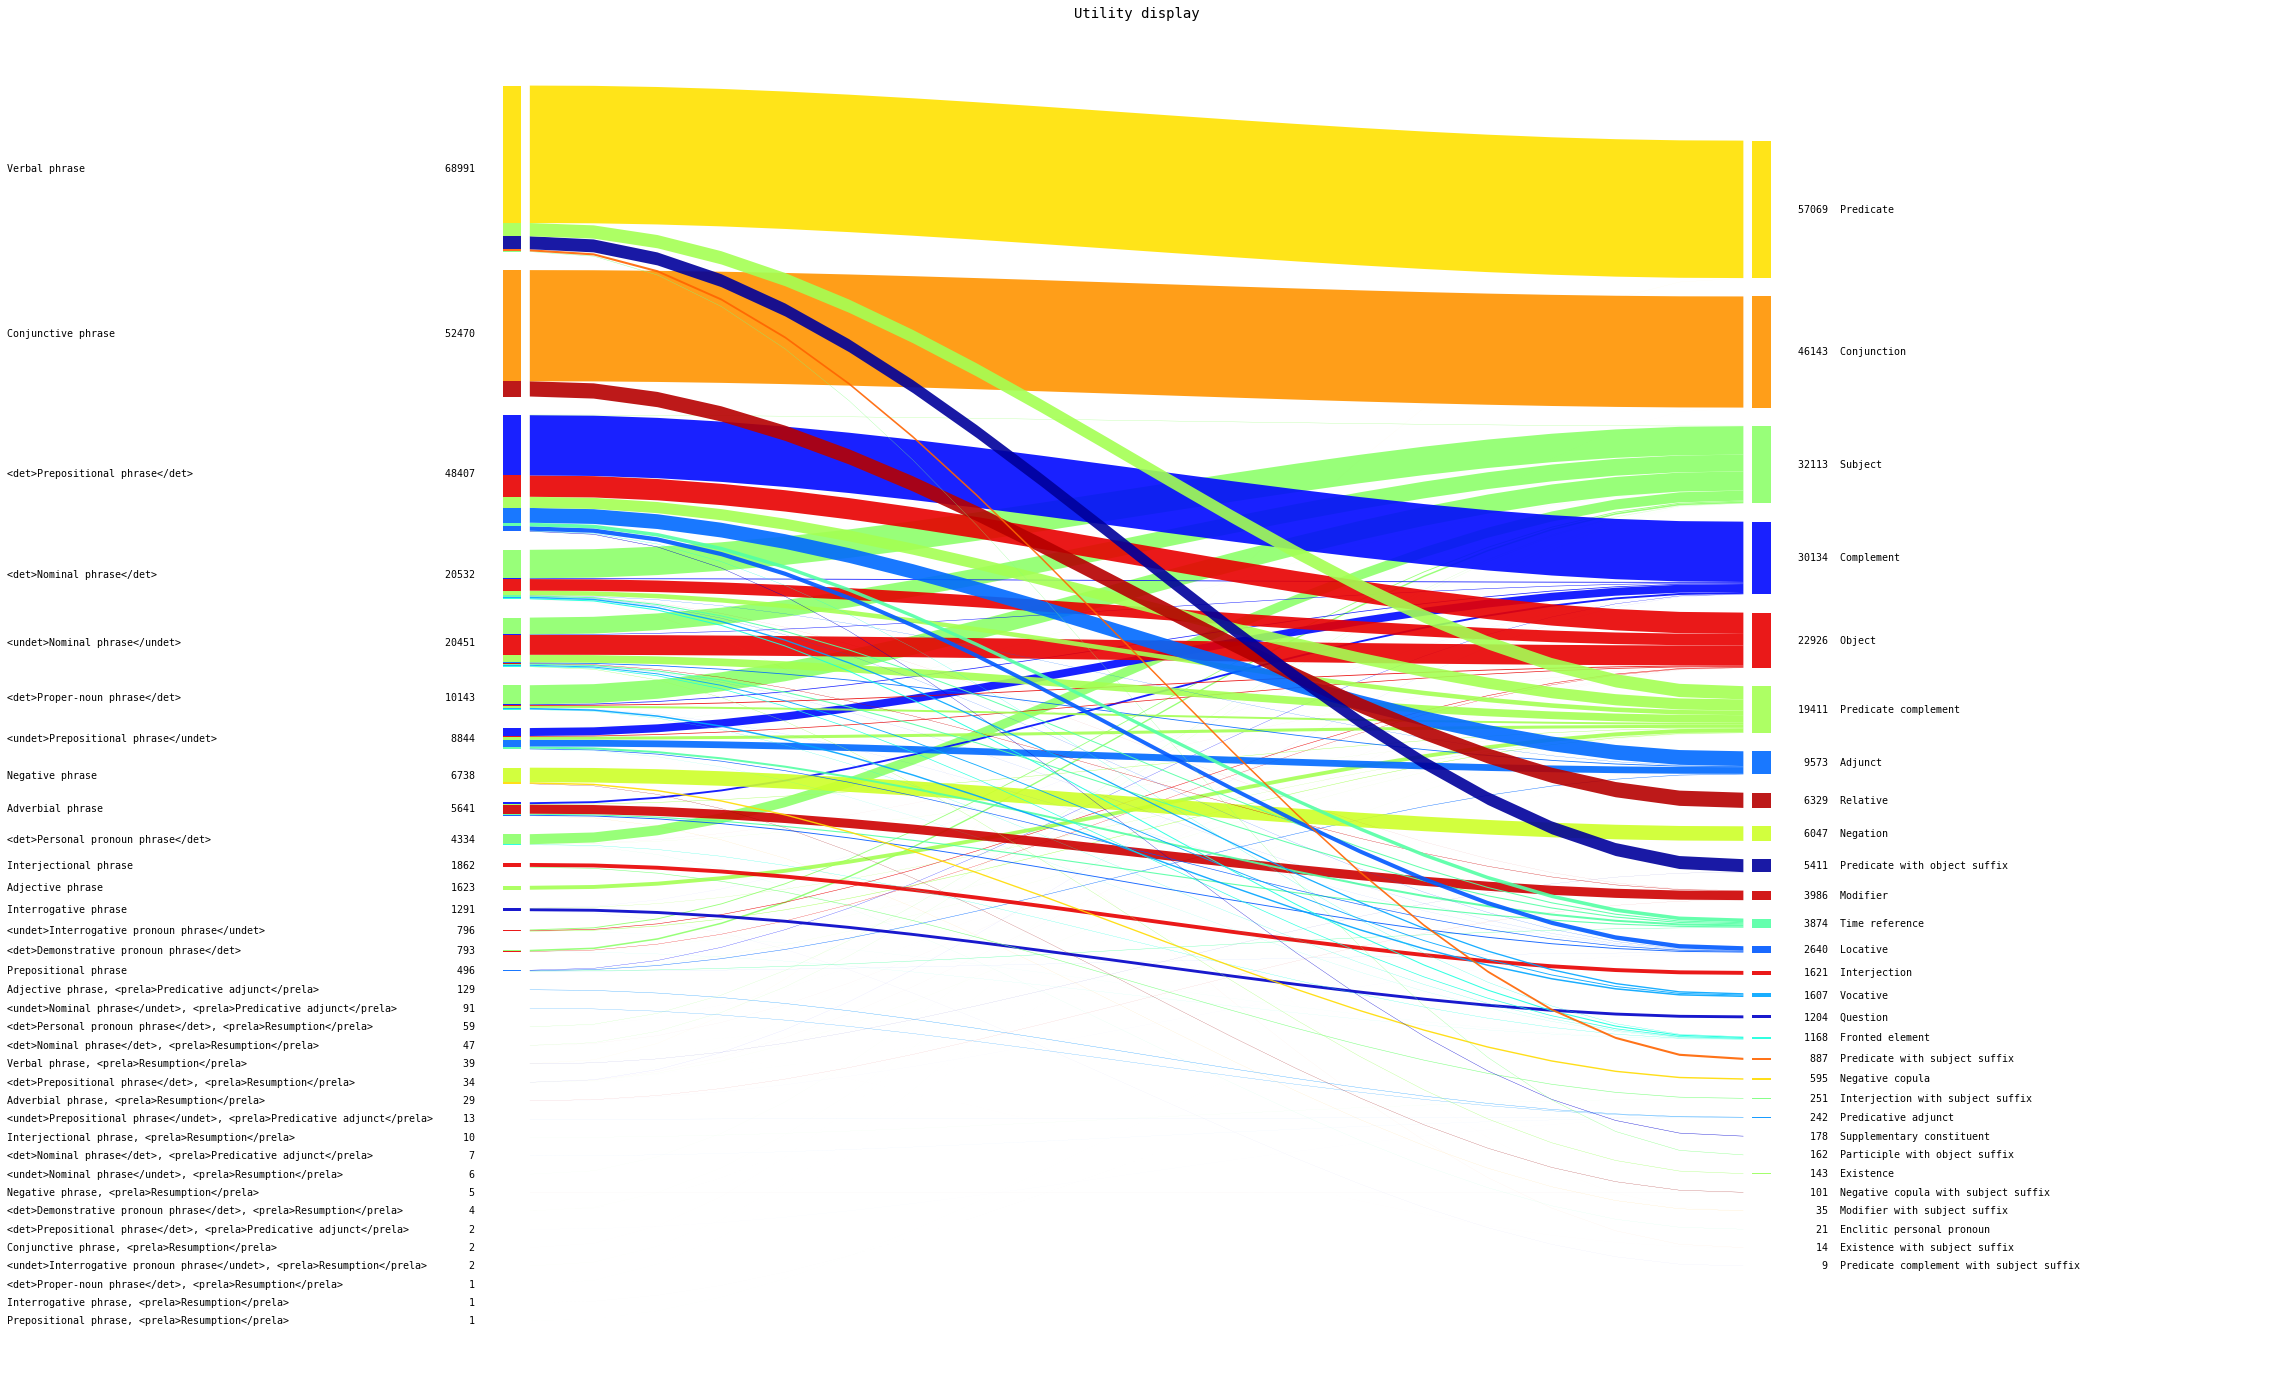

In [20]:

import alluvial
import matplotlib.cm
import numpy as np

input_data = list(zip(df["ptyp"],df["pfunction"]))

# Plotting:
cmap = matplotlib.cm.get_cmap('jet')
ax = alluvial.plot(
    input_data,  alpha=0.9, color_side=1, rand_seed=seed, figsize=(25,25),
    disp_width=True,  wdisp_sep=' '*2, cmap=cmap, fontname='Monospace')

ax.set_title('Utility display', fontsize=14, fontname='Monospace')
plt.show()